# KIOS Graduate Summer School 2018 on Intelligent Systems and Control

# Regression exercise

Welcome to this practical session!

In this exercise you will be asked to predict the energy efficiency of buildings given various building parameters, such as, the surface area and height. You will become familiar with **pandas** (a powerful tool for data analysis) and **scikit-learn** (a popular machine learning library).

Let's get started!

## Problem description

You will be asked to predict the heating load and cooling load of buildings given various building parameters. Specifically, the following information will be given for each building.

    X1 Relative Compactness
    X2 Surface Area
    X3 Wall Area
    X4 Roof Area
    X5 Overall Height
    X6 Orientation
    X7 Glazing Area
    X8 Glazing Area Distribution

    y1 Heating Load
    y2 Cooling Load

## Outline

![outline](images/outline.png)

## 1. Import libraries

Run the following to import all the necessary libraries we will be using.

In [1]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# For visualisations
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pydot

Fix the random seed. Do not change the seed in order to allow the reproducibility of the results!

In [2]:
seed = 0
np.random.seed(seed)

## 2. Dataset exploration

Below we provide the directory of the training set.

In [3]:
dir_training = 'datasets/energy_efficiency_training.csv'

First let's load the dataset into a pandas dataframe. [(Hint)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [4]:
df_training = pd.read_csv(dir_training)

It is generally a good practise to randomly shuffle the dataset to make sure that the training/validation sets are representative of the overall distribution of the data. ([Hint](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html); use the random seed defined earlier).

In [5]:
df_training = df_training.sample(frac=1, random_state=seed)
df_training.reset_index(drop=True, inplace=True) # re-order the indices

Let us now find the dimensionality (shape) of the dataset.

In [6]:
training_shape = df_training.shape
print 'Shape of the training set: ', training_shape

Shape of the training set:  (614, 10)


Print the first three lines of the training set to display a small sample. [(Hint)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)

In [7]:
df_training.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.69,735.0,294.0,220.5,3.5,2,0.25,4,12.91,15.37
1,0.71,710.5,269.5,220.5,3.5,3,0.10,1,10.80,14.28
2,0.86,588.0,294.0,147.0,7.0,3,0.40,5,31.81,31.20


Generate descriptive statistics that summarize the central tendency, dispersion and shape of the dataset’s distribution. ([Hint](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html))

In [8]:
df_training.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.762182,673.430782,318.619707,177.405537,5.221498,3.485342,0.236401,2.806189,22.179511,24.518143
std,0.105228,88.027282,43.099064,45.030589,1.751195,1.108596,0.132973,1.544308,9.978302,9.465003
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,594.125000,294.000000,147.000000,3.500000,3.000000,0.100000,1.250000,13.000000,15.762500
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000,18.775000,21.825000
75%,0.850000,759.500000,343.000000,220.500000,7.000000,4.000000,0.400000,4.000000,31.287500,33.055000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.960000,48.030000


Let's explore the dataset in more detail. Print a consise summary of the training set that includes, among others, the type of the columns and the number of non-null values. [(Hint)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)

In [9]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
X1    614 non-null float64
X2    614 non-null float64
X3    614 non-null float64
X4    614 non-null float64
X5    614 non-null float64
X6    614 non-null int64
X7    614 non-null float64
X8    614 non-null int64
Y1    614 non-null float64
Y2    614 non-null float64
dtypes: float64(8), int64(2)
memory usage: 48.0 KB


Obtain the column names of the training set.

In [10]:
columns = df_training.columns
print 'Columns:\n', columns

Columns:
Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'Y1', u'Y2'], dtype='object')


Run the following to obtain the feature names.

In [11]:
targets_all = ['Y1', 'Y2']
features = [f for f in columns if f not in targets_all]
print 'Features:\n', features

Features:
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


Let's currently focus on a single target.

In [12]:
target = 'Y1'

Split the feature columns from the target column.

In [13]:
df_training_X = df_training[features]
df_training_y = df_training[target]

print 'Shape of training set (features): ', df_training_X.shape
print 'Shape of training set (target): ', df_training_y.shape

Shape of training set (features):  (614, 8)
Shape of training set (target):  (614,)


## 3. Data pre-processing

Data pre-processing refers to a sequence of transformations applied to data before feeding them to a machine learning algorithm, for example:
* dealing with missing values
* dealing with outliers
* feature scaling
* converting categorical features to dummy variables (one hot encoding)
* transforming skewed data distributions

This practical exercise will focus on one such transformation called *feature scaling* that causes the features to have roughly the same magnitude. Without this step some features may gain more importance or have a higher influence. Feature scaling is particularly useful for methods that consider a distance-related metric (e.g. k-NN) or use gradient descent (e.g. neural networks).

One way to perform feature scaling is *feature standardisation*. where a continuous feature $X$ with mean $\mu$ and standard deviation $\sigma$ will be transformed as follows: $X \leftarrow  \frac{X - \mu}{\sigma}$

Let's start by calculating the means ([Hint](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)) and standard deviations ([Hint](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)) of the *df_training_X* dataset.

In [14]:
means = df_training_X.mean()
stds = df_training_X.std()

Write a function that takes as inputs a dataframe, its feature means and standard deviations, and performs feature scaling.

In [15]:
def standardise_features(df, means, stds):
    df_std = (df - means) / stds
    
    return df_std

Use the function you have just written to standardise the training set.

In [16]:
df_training_X_std = standardise_features(df_training_X, means, stds)

Run the following to observe a sample of the standardised dataset.

In [17]:
df_training_X_std.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8
0,-0.685964,0.699433,-0.571235,0.957004,-0.983042,-1.339840,0.102272,0.773039
1,-0.495900,0.421111,-1.139693,0.957004,-0.983042,-0.437799,-1.025777,-1.169578
2,0.929580,-0.970503,-0.571235,-0.675220,1.015593,-0.437799,1.230321,1.420578


## 4. Cross-validation

*Cross-validation* is used to help you identify the best model for the problem. In this exercise we will use the *holdout* cross-validation. In another exercise you will learn about the *k-fold* cross-validation.

Let's start by creating the validation set (i.e. the holdout set). You are given the ratio of the training set that will form the validation set.

In [18]:
valid_ratio = 0.25

Create the *train* and *validation* sets from the *training* set. Do the same for the *standardised training* set. ([Hint](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html); disable data shuffling)

In [19]:
# Split datasets
df_train_X, df_valid_X = train_test_split(df_training_X, test_size=valid_ratio, shuffle=False)
df_train_X_std, df_valid_X_std = train_test_split(df_training_X_std, test_size=valid_ratio, shuffle=False)
df_train_y, df_valid_y = train_test_split(df_training_y, test_size=valid_ratio, shuffle=False)

Re-order the dataframes' indices.

In [20]:
splits = [df_train_X, df_valid_X, df_train_y, df_valid_y, df_train_X_std, df_valid_X_std]
for d in splits:
    d.reset_index(drop=True, inplace=True)

Run the following to display the dimensionalities of the created dataframes.

In [21]:
print 'Shape of:'
print 'df_train_X: ', df_train_X.shape
print 'df_train_y: ', df_train_y.shape
print 'df_valid_X: ', df_valid_X.shape
print 'df_valid_y: ', df_valid_y.shape

Shape of:
df_train_X:  (460, 8)
df_train_y:  (460,)
df_valid_X:  (154, 8)
df_valid_y:  (154,)


## 5. Importance of feature scaling

The following function takes as inputs a machine learning model, training set and test set. Complete the function that trains ('fits') the model on the training set, makes predictions on both the training and test sets, and returns the performance. In this exercise our performance metric is the [mean squared error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). (Hint: you may find the examples from this [tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) useful)

In [22]:
def train_model(model, df_train_X, df_train_y, df_test_X, df_test_y):
    # Fit model on training set
    model.fit(df_train_X, df_train_y)
    
    # Predictions and performance (MSE) on training set
    train_y_pred = model.predict(df_train_X)
    mse_train = metrics.mean_squared_error(df_train_y, train_y_pred)
    
    # Predictions and performance (MSE) on test set
    test_y_pred = model.predict(df_test_X)
    mse_test = metrics.mean_squared_error(df_test_y, test_y_pred)
    
    return mse_train, mse_test

Define a neural network ([MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)). Set the maximum number of iterations to be 1000 and don't forget to fix the random seed. Leave the rest of the parameters to their default values.

In [23]:
nn = MLPRegressor(max_iter=1000, random_state = seed)

Use the *train_model* function you wrote earlier to train the neural network you have just defined, and obtain the performance on the original validation set and the standardised one.

In [24]:
# without feature scaling
_, nn_mse_valid = train_model(nn, df_train_X, df_train_y, df_valid_X, df_valid_y)

# with feature
_, nn_mse_valid_std = train_model(nn, df_train_X_std, df_train_y, df_valid_X_std, df_valid_y)

Run the following to see how important feature scaling is!

In [25]:
print 'Mean squared error on validation set : ', nn_mse_valid
print 'Mean squared error on standardised validation set: ', nn_mse_valid_std

Mean squared error on validation set :  28.601887927929972
Mean squared error on standardised validation set:  5.01632905395042


## 6. Model selection

We will use the validation set to identify the best machine learning model. You will get the chance to try out both linear and non-linear models, specifically, you will use linear regression, a decision tree and a neural network!

### Linear Regression

Let's start by defining a linear regression model. ([LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

In [26]:
lr = LinearRegression()

Obtain its performance on the validation set. Take a moment to think whether you need to use the original or standardised training / validation sets.

In [27]:
_, mse_valid_lr = train_model(lr, df_train_X, df_train_y, df_valid_X, df_valid_y)
print 'Mean squared error on validation set using linear regression: ', '%.2f' % mse_valid_lr

Mean squared error on validation set using linear regression:  8.00


### Decision Tree

Define a decision tree. ([DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor); don't forget to fix the random seed, leave the rest of the parameters to their default value)

In [28]:
dt = DecisionTreeRegressor(random_state=seed)

Obtain its performance on the validation set. Take a moment to think whether you need to use the original or standardised training / validation sets.

In [29]:
mse_train_dt, mse_valid_dt = train_model(dt, df_train_X, df_train_y, df_valid_X, df_valid_y)
print 'Mean squared error on validation set using decision tree: ', '%.2f' % mse_valid_dt

Mean squared error on validation set using decision tree:  0.49


This is a considerable improvement over linear regression! This is attributed to the fact that a decision tree is non-linear.

### Neural Network

You will now examine various neural network models! A neural network has many hyper-parameters and cross-validation will help us tune these and select the best.

A neural netowrk is very sensitive to these hyper-parameters. To demonstrate these you will try out many neural networks. We have provided the model *nn1* below, define your own models *nn2*, *nn3* and *nn4* using [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

In [30]:
nn1 = MLPRegressor(
        max_iter=1000,
        hidden_layer_sizes = (100,),
        activation = 'logistic',
        solver = 'sgd',
        alpha = 0.0001,
        batch_size = 'auto',
        learning_rate_init = 0.001,
        learning_rate = 'constant',
        random_state = seed
    )

nn2 = MLPRegressor(
        max_iter=1000,
        hidden_layer_sizes = (100,),
        activation = 'relu',
        solver = 'adam',
        alpha = 0.0001,
        batch_size = 'auto',
        learning_rate_init = 0.001,
        learning_rate = 'constant',
        random_state = seed
    )

nn3 = MLPRegressor(
        max_iter=1000,
        hidden_layer_sizes = (16, 16),
        activation = 'relu',
        solver = 'adam',
        alpha = 0.0001,
        batch_size = 'auto',
        learning_rate_init = 0.001,
        learning_rate = 'constant',
        random_state = seed
    )

nn4 = MLPRegressor(
        max_iter=1000,
        hidden_layer_sizes = (100, 100),
        activation = 'tanh',
        solver = 'adam',
        alpha = 0.0001,
        batch_size = 'auto',
        learning_rate_init = 0.001,
        learning_rate = 'constant',
        random_state = seed
    )

Below we provide a neural network model after we performed hyper-parameter tuning.

In [31]:
nn5 = MLPRegressor(
        max_iter=1000,
        hidden_layer_sizes = (100, 16, 16),
        activation = 'relu',
        solver = 'adam',
        alpha = 0.001,
        batch_size = 16,
        learning_rate_init = 0.001,
        learning_rate = 'constant',
        random_state = seed
    )

Let's obtain the performance of each model on the validation set.

In [32]:
nn_models = [nn1, nn2, nn3, nn4, nn5]

for i in range(len(nn_models)):
    nn = nn_models[i]
    
    _, mse_valid_nn = train_model(nn, df_train_X_std, df_train_y, df_valid_X_std, df_valid_y)
    print 'Mean squared error on validation set using neural network nn' + str(i + 1), ': ', '%.2f' % mse_valid_nn

Mean squared error on validation set using neural network nn1 :  8.94
Mean squared error on validation set using neural network nn2 :  5.02
Mean squared error on validation set using neural network nn3 :  3.49
Mean squared error on validation set using neural network nn4 :  0.68
Mean squared error on validation set using neural network nn5 :  0.40


To sum up, a neural network has many hyper-parameters and it's very sensitive to them. For instance, *nn1* has a similar performance to linear regression while the well-tuned *nn5* performs slightly better than the decision tree.

## 7. Learning curves

Assume that we wish to find out if getting more training data would be beneficial. The learning curves will come in handy!

Use the train_model function you defined earlier to calculate the mean squared error of the neural network model nn5 on the training and validation sets for various given training set sizes.

In [33]:
sizes = list(range(10,df_train_X.shape[0],50)) + [df_train_X.shape[0]]

lst_mse_train_nn = []
lst_mse_valid_nn = []

for s in sizes:
    mse_train_nn, mse_valid_nn = train_model(nn5,
                                             df_train_X_std.iloc[:s,:],
                                             df_train_y.iloc[:s],
                                             df_valid_X_std,
                                             df_valid_y)    
    
    lst_mse_train_nn.append(mse_train_nn)
    lst_mse_valid_nn.append(mse_valid_nn)

Run the following to generate the learning curves.

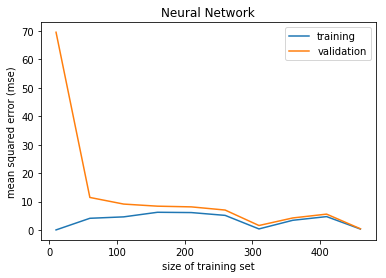

In [34]:
plt.figure(0)

plt.plot(sizes, lst_mse_train_nn, label='training')
plt.plot(sizes, lst_mse_valid_nn, label='validation')

plt.title('Neural Network')            # title
plt.xlabel('size of training set')     # x-axis name
plt.ylabel('mean squared error (mse)') # x-axis name
leg = plt.legend()                     # add legend

We can you conclude about getting more data?

## 8. Final evaluation

The final evaluation will be conducted on an independent test set completely unseen by the training process.

Run the following to load the test set into a pandas dataframe.

In [35]:
# directory of test set
dir_test = 'datasets/energy_efficiency_test.csv'

# load test set
df_test = pd.read_csv(dir_test, index_col=False)

Split the features and the target.

In [36]:
df_test_X = df_test[features]
df_test_y = df_test[target]

Since the performnace of the decision tree *dt* and neural network *nn5* is very close, we will focus on the former because, as we will show shortly, it is more 'interpretable'.

Calculate the predictions and performance (MSE) on the test set for *dt*.

In [37]:
test_y_pred_dt = dt.predict(df_test_X)
mse_test_dt = metrics.mean_squared_error(df_test_y, test_y_pred_dt)

Run the following to display the MSE on all datasets.

In [38]:
print 'Mean squared error on training set using decision tree: ', '%.2f' % mse_train_dt
print 'Mean squared error on validation set using decision tree: ', '%.2f' % mse_valid_dt
print 'Mean squared error on test set using decision tree: ', '%.2f' % mse_test_dt

Mean squared error on training set using decision tree:  0.00
Mean squared error on validation set using decision tree:  0.49
Mean squared error on test set using decision tree:  0.85


Lastly, let's print out a sample of the predictions to see how we did!

In [39]:
print 'Sample test set'
print list(df_test_y)[:10]

print '\n'

print 'Predictions'
print list(test_y_pred_dt)[:10]

Sample test set
[15.18, 10.32, 37.26, 16.95, 32.26, 27.9, 28.18, 28.95, 29.07, 23.8]


Predictions
[15.16, 10.45, 35.65, 15.98, 32.53, 29.14, 28.57, 29.49, 28.4, 22.8]


## 9. Feature selection

It turns out that some of the features have a stronger predictive power than others. Feature selection offers many potential benefits; it can boost regression or classification performance and provide insight to the data by returning only the top predictors. It can further facilitate data visualisation, reduce storage requirements and execution runtime of learning algorithms.

We will learn about <span style="color:red">feature selection</span> and <span style="color:red">dimensionality reduction</span> (feature projection) in detail in another practical exercise. For now, we provide a list of the 'best' features.

In [40]:
best_features = ['X1', 'X7']

Run the following to define a new decision tree.

In [41]:
model = DecisionTreeRegressor(random_state=seed)

Fit the model on the selected subset of features and calculate the performance on all datasets.

In [42]:
# fit the model on train set
model.fit(df_train_X[best_features], df_train_y)

# performance on train set
train_y_pred = model.predict(df_train_X[best_features])
mse_train = metrics.mean_squared_error(df_train_y, train_y_pred)

# performance on validation set
valid_y_pred = model.predict(df_valid_X[best_features])
mse_valid = metrics.mean_squared_error(df_valid_y, valid_y_pred)

# performance on test set
test_y_pred = model.predict(df_test_X[best_features])
mse_test = metrics.mean_squared_error(df_test_y, test_y_pred)

Run the following to display the MSE on all datasets using feature selection.

In [43]:
print 'Mean squared error on training set using decision tree: ', '%.2f' % mse_train
print 'Mean squared error on validation set using decision tree: ', '%.2f' % mse_valid
print 'Mean squared error on test set using decision tree: ', '%.2f' % mse_test

Mean squared error on training set using decision tree:  0.19
Mean squared error on validation set using decision tree:  0.56
Mean squared error on test set using decision tree:  0.59


## 10. Visualisation

We have mentioned earlier that a decision tree is highly 'interpretable' compared to other models. Let's visualise it to see why! Check the file *tree.png* that will be generated.

In [44]:
dot_data = tree.export_graphviz(
    model,
    out_file='tree.dot', 
    feature_names=best_features,
    class_names=target,
    filled=True, rounded=True, special_characters=True)  

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Congratulations on finishing this practical exercise! :-)

There are still plenty of things you could experiment with, such as:
* Change target to 'Y2' to see the new behaviour and performance of the models (Section 2)
* Try out more machine learning models such as SVMs (Section 6)
* Experiment with other feature subsets (Section 9)